# Week 2

## Install Some Jupyter Extensions

* Make sure you `conda install -c conda-forge nodejs` first, 
  from a terminal...,  
  and in the right environment!
* Intall ipympl with `conda install -c conda-forge ipympl`
* Install `@jupyter-widgets/jupyterlab-manager`  
* Install `@jupyterlab/toc`  
* Rebuild (from the noteook) and wait till it asks you to reload  
  There is sadly no "busy" in
 dicator and you will lose any change you make after pressing build

# MatplotLib: Inline Plots

In [86]:
import sys; sys.path

['/home/femianjc/Courses/CSE620B/WK2',
 '/home/femianjc/anaconda3/envs/cse620B/lib/python37.zip',
 '/home/femianjc/anaconda3/envs/cse620B/lib/python3.7',
 '/home/femianjc/anaconda3/envs/cse620B/lib/python3.7/lib-dynload',
 '',
 '/home/femianjc/anaconda3/envs/cse620B/lib/python3.7/site-packages',
 '/home/femianjc/anaconda3/envs/cse620B/lib/python3.7/site-packages/IPython/extensions',
 '/home/femianjc/.ipython']

In [87]:
%matplotlib widget

In [88]:
from matplotlib.pylab import plt

In [4]:
plt.close('Demo1')
plt.figure('Demo1')
im = plt.imread(('../data/HighResolutionOrthoimagery/MN/2012/'
                '201203_minneapolis-st_paul_mn_0x3000m_utm15_clr/vol001/15tvk805755.tif'))
plt.imshow(im);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
plt.plot([0,   1000, 2000,  3000, 4000], 
         [2000, 4000, 2000, 1500, 2000], 
        lw=3)

# Fiona: Dealing with Vector Data

Find some vector data from https://overpass-turbo.eu/

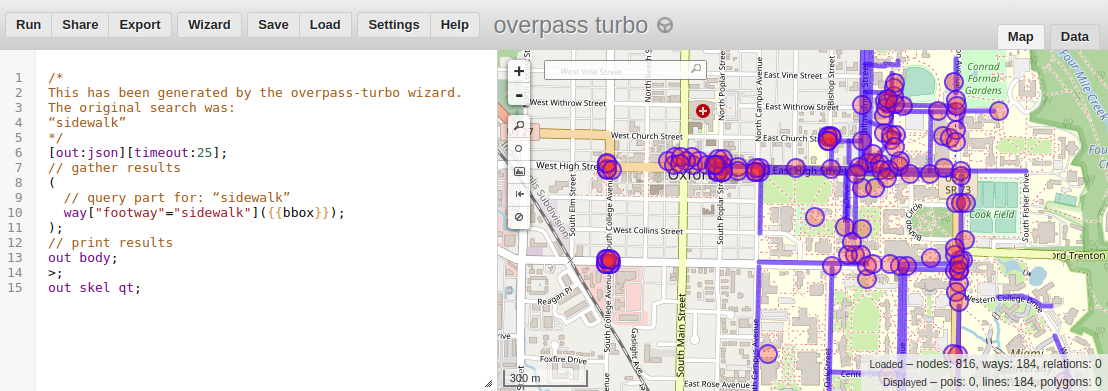

Export the data as a geojson file

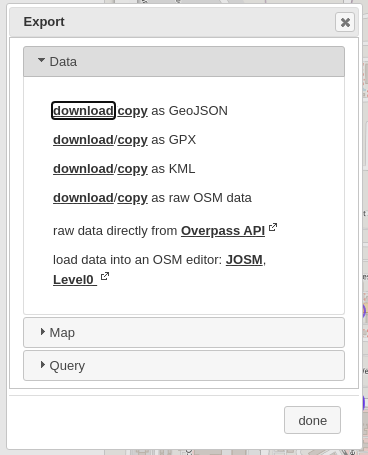

I have put an export into a local file `../data/export.geojson`

In [6]:
import fiona

In [7]:
# vds stands for 'vector dataset'
vds = fiona.open('../data/export.geojson')

In [8]:
record1 = vds[0]

In [9]:
record1

{'type': 'Feature',
 'id': '0',
 'geometry': {'type': 'LineString',
  'coordinates': [(-93.2410372, 44.9590861),
   (-93.2410315, 44.9591706),
   (-93.2410327, 44.9592463),
   (-93.2410383, 44.9595938),
   (-93.2410393, 44.9608863),
   (-93.2410394, 44.960964),
   (-93.2410399, 44.9610445),
   (-93.2410412, 44.9612699),
   (-93.2410463, 44.9621935),
   (-93.2410483, 44.9626683),
   (-93.2410494, 44.9627517),
   (-93.2410518, 44.9628409),
   (-93.2410496, 44.9630418),
   (-93.2410483, 44.9633196),
   (-93.2410455, 44.9639488),
   (-93.241041, 44.9639983),
   (-93.2410263, 44.9640577),
   (-93.240129, 44.9640586),
   (-93.239765, 44.9640567),
   (-93.2394271, 44.9640428),
   (-93.2394215, 44.9639885)]},
 'properties': OrderedDict([('id', 'way/42857475'),
              ('@id', 'way/42857475'),
              ('foot', 'yes'),
              ('footway', 'sidewalk'),
              ('highway', 'footway'),
              ('bicycle', None),
              ('bridge', None),
              ('horse', N

In [10]:
record1['geometry']

{'type': 'LineString',
 'coordinates': [(-93.2410372, 44.9590861),
  (-93.2410315, 44.9591706),
  (-93.2410327, 44.9592463),
  (-93.2410383, 44.9595938),
  (-93.2410393, 44.9608863),
  (-93.2410394, 44.960964),
  (-93.2410399, 44.9610445),
  (-93.2410412, 44.9612699),
  (-93.2410463, 44.9621935),
  (-93.2410483, 44.9626683),
  (-93.2410494, 44.9627517),
  (-93.2410518, 44.9628409),
  (-93.2410496, 44.9630418),
  (-93.2410483, 44.9633196),
  (-93.2410455, 44.9639488),
  (-93.241041, 44.9639983),
  (-93.2410263, 44.9640577),
  (-93.240129, 44.9640586),
  (-93.239765, 44.9640567),
  (-93.2394271, 44.9640428),
  (-93.2394215, 44.9639885)]}

In [11]:
record1['properties']['footway']

'sidewalk'

## Use Shapeley to Represent geometry

In [12]:
import shapely
import shapely.geometry

In [13]:
s = shapely.geometry.shape(record1['geometry'])

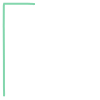

In [14]:
s

In [15]:
# Get the XY coordinates
x, y = s.xy

If we are lucky, the datasat has a CRS. 
Otherwise, you need to figure it out from context

In [42]:
vds.crs

{'init': 'epsg:4326'}

In [49]:
plt.close('latsandlons');  plt.figure('latsandlons')
plt.plot(x, y, '-ro', c=(1, 0, 0))
plt.axis('equal');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Dealing wioth Different CRS

I downloaded high resolution orthoiumagery from USGS EarthXplorer. 
https://earthexplorer.usgs.gov/

In [16]:
filename = ('../data/HighResolutionOrthoimagery/MN/2012/'
            '201203_minneapolis-st_paul_mn_0x3000m_utm15_clr/vol001/15tvk805755.tif')

In [18]:
import rasterio as rio

In [20]:
# rds stands for Raster Dataset
rds = rio.open(filename)

In [21]:
rds.crs

CRS({'init': 'epsg:26915'})

In [34]:
rds.crs.wkt

'PROJCS["NAD83 / UTM zone 15N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26915"]]'

In [44]:
rio.crs.CRS(vds.crs).wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

In [40]:
import numpy as np

In [41]:
x, y = s.xy
x = np.asarray(x)
y = np.asarray(y)
np.column_stack([x, y])

array([[-93.2410372,  44.9590861],
       [-93.2410315,  44.9591706],
       [-93.2410327,  44.9592463],
       [-93.2410383,  44.9595938],
       [-93.2410393,  44.9608863],
       [-93.2410394,  44.960964 ],
       [-93.2410399,  44.9610445],
       [-93.2410412,  44.9612699],
       [-93.2410463,  44.9621935],
       [-93.2410483,  44.9626683],
       [-93.2410494,  44.9627517],
       [-93.2410518,  44.9628409],
       [-93.2410496,  44.9630418],
       [-93.2410483,  44.9633196],
       [-93.2410455,  44.9639488],
       [-93.241041 ,  44.9639983],
       [-93.2410263,  44.9640577],
       [-93.240129 ,  44.9640586],
       [-93.239765 ,  44.9640567],
       [-93.2394271,  44.9640428],
       [-93.2394215,  44.9639885]])

```bash 
!conda install -y -n cse620B proj4
```

In [30]:
import pyproj

In [33]:
utm_x, utm_y = pyproj.transform(pyproj.Proj(vds.crs),  # WGs84 
                              pyproj.Proj(rds.crs), # NAD83 / UTM zone 15N"
                              x, y)
np.column_stack([utm_x, utm_y])

array([[ 480989.06619042, 4978433.65677293],
       [ 480989.54365996, 4978443.04224828],
       [ 480989.47401151, 4978451.45178001],
       [ 480989.14708485, 4978490.05566388],
       [ 480989.49503269, 4978633.63526556],
       [ 480989.51280476, 4978642.26671506],
       [ 480989.49995407, 4978651.20930084],
       [ 480989.47185976, 4978676.24851827],
       [ 480989.37464566, 4978778.84927943],
       [ 480989.37371518, 4978831.59366308],
       [ 480989.31450536, 4978840.85854336],
       [ 480989.15468524, 4978850.76803088],
       [ 480989.39453956, 4978873.08481374],
       [ 480989.58881057, 4978903.94436874],
       [ 480990.01743085, 4978973.83941181],
       [ 480990.38866946, 4978979.33714462],
       [ 480991.56759541, 4978985.93224371],
       [ 481062.33305984, 4978985.82224688],
       [ 481091.03913452, 4978985.52622691],
       [ 481117.68290953, 4978983.90337437],
       [ 481118.106739  , 4978977.87006649]])

In [45]:
import shapely.ops

In [46]:
def tfm(x, y):
    return pyproj.transform(pyproj.Proj(vds.crs),  # WGs84 
                     pyproj.Proj(rds.crs), # NAD83 / UTM zone 15N"
                     x, y)
    
shapes = [shapely.ops.transform(tfm,  shapely.geometry.shape(f['geometry'])) for f in vds]

(array('d', [480524.50538465334, 480521.6499475475]), array('d', [4978849.233596989, 4978854.263455287]))


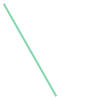

In [47]:
print(shapes[30].xy)
shapes[30]

# Understanding Affine Transformation Matrices

## Some Terms / Lin. Alg. Background

tensor: ND array of numbers

matrix: 2D tensor

https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/

http://math.mit.edu/~gs/linearalgebra/

## 2D Affine Transform (sans translation)

In [48]:
A = np.array(
[[2.0 ,0.0], 
 [0.0, 1.0]])
A


array([[2., 0.],
       [0., 1.]])

In [49]:
B = np.row_stack([x, y])
B.shape

(2, 21)

In [50]:
A.shape

(2, 2)

In numpy, `A*B` is a Hadamard (elementw wise) project, matrices need to be the same shape

_Actually_, the numpy rule is more like:
1.  They must have the same number of dimensions (e.g. 2)
2.  Each dimension must _either_  
    1.  Be the same for `A` and `B`, or
    1.  Must be `1`. in which case the subarray will be repeated. 

The _matrix_ product uses the _rows_ of B to mix the _columns_ of A. 

In [54]:
A @ B

array([[-186.4820744, -186.482063 , -186.4820654, -186.4820766,
        -186.4820786, -186.4820788, -186.4820798, -186.4820824,
        -186.4820926, -186.4820966, -186.4820988, -186.4821036,
        -186.4820992, -186.4820966, -186.482091 , -186.482082 ,
        -186.4820526, -186.480258 , -186.47953  , -186.4788542,
        -186.478843 ],
       [  44.9590861,   44.9591706,   44.9592463,   44.9595938,
          44.9608863,   44.960964 ,   44.9610445,   44.9612699,
          44.9621935,   44.9626683,   44.9627517,   44.9628409,
          44.9630418,   44.9633196,   44.9639488,   44.9639983,
          44.9640577,   44.9640586,   44.9640567,   44.9640428,
          44.9639885]])

A[0,0] -- scales in X  
A[0,1] -- skew/tilt/rotation of X (almost always zero!)  
A[1,0] -- "----" of Y (almost always zero)  
A[1,1] -- scales in Y  

In [112]:
A

array([[2., 0.],
       [0., 1.]])

In [116]:
np.linalg.inv(A)

array([[0.5, 0. ],
       [0. , 1. ]])

In [120]:
t = np.asarray([100, 10])

In [124]:
A @ B + t[:,None]

array([[-86.4820744, -86.482063 , -86.4820654, -86.4820766, -86.4820786,
        -86.4820788, -86.4820798, -86.4820824, -86.4820926, -86.4820966,
        -86.4820988, -86.4821036, -86.4820992, -86.4820966, -86.482091 ,
        -86.482082 , -86.4820526, -86.480258 , -86.47953  , -86.4788542,
        -86.478843 ],
       [ 54.9590861,  54.9591706,  54.9592463,  54.9595938,  54.9608863,
         54.960964 ,  54.9610445,  54.9612699,  54.9621935,  54.9626683,
         54.9627517,  54.9628409,  54.9630418,  54.9633196,  54.9639488,
         54.9639983,  54.9640577,  54.9640586,  54.9640567,  54.9640428,
         54.9639885]])

In [125]:
(A@B).shape

(2, 21)

In [129]:
t[:, None].shape

(2, 1)

In [130]:
x = [1, 2, 3, 4, 5]

In [135]:
x[4], x[-1]

(5, 5)

In [137]:
x[1:]

[2, 3, 4, 5]

In [138]:
x[:3]

[1, 2, 3]

In [139]:
x[2:4]

[3, 4]

In [141]:
x[2], x[3]

(3, 4)

In [144]:
x[::2]

[1, 3, 5]

In [145]:
x[1::2]

[2, 4]

In [146]:
x[::-1]

[5, 4, 3, 2, 1]

In [150]:
slice(1, 10, 2)

slice(1, 10, 2)

In [151]:
x = np.array(x)

In [152]:
x[2:4]

array([3, 4])

In [154]:
x[:]

array([1, 2, 3, 4, 5])

In [155]:
A.shape

(2, 2)

In [156]:
A[:, 1]

array([0., 1.])

In [157]:
A[1, :]

array([0., 1.])

In [158]:
A[1, ::-1]

array([1., 0.])

In [160]:
x

array([1, 2, 3, 4, 5])

In [163]:
x[None, None].shape

(1, 1, 5)

In [164]:
A

array([[2., 0.],
       [0., 1.]])

In [166]:
A[0] == A[0, :]

array([ True,  True])

In [167]:
x[:, None]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [171]:
z = np.random.rand(5, 6, 7)

In [173]:
z.shape

(5, 6, 7)

In [175]:
z[None].shape

(1, 5, 6, 7)

In [180]:
z[:, :,  None, :].shape

(5, 6, 1, 7)

In [182]:
z.shape

(5, 6, 7)

In [183]:
q = np.random.rand(5, 7)

In [186]:
(z + q[:, None, :]).shape

(5, 6, 7)

In [190]:
z.shape

(5, 6, 7)

In [189]:
z.transpose(1, 2, 0).shape

(6, 7, 5)

In [191]:
import affine

In [194]:
# A @ X + t === affine transforme

A = np.array([[1, 0, 10],
              [0, 2, 15]])
A

array([[ 1,  0, 10],
       [ 0,  2, 15]])

In [195]:
X = np.asarray([5, 5, 1])  # last coordinate alsways 1

In [196]:
A @ X

array([15, 25])

In [197]:
A = np.array([[1, 0, 10],
              [0, 2, 15], 
              [0, 0, 1]])
A

array([[ 1,  0, 10],
       [ 0,  2, 15],
       [ 0,  0,  1]])

In [198]:
A @ X

array([15, 25,  1])

## The `rasterio` module uses the `Affine` class
The `Affine` class, unlike numy arrays, overrides the `__mul__` operator (`*`) for matrix multiply, not `@`  
The `__inv__`, or `~`, operator is used bythe `Affine` class to ibnvert the matrix.

In [56]:
rds.affine  # IMages (row and col) ===> geo coordiantes (CRS, e.g. WGS84)

Affine(0.3, 0.0, 480500.0,
       0.0, -0.3, 4977000.0)

In [58]:
rds.affine*(50, 35)  # With Afffine, '*' is '@'

(480515.0, 4976989.5)

In [59]:
~rds.affine*(480515.0, 4976989.5)

(50.0, 35.0)

## Convert geo to pixel indices

In [80]:
utm_shape = shapely.ops.transform(tfm, s)
pixel_shape = shapely.ops.transform(rds.index, utm_shape)

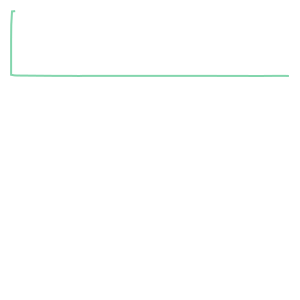

In [83]:
pixel_shape

Rasterios plot sets the extent of the image to be in its own CRS

(In this case, UTM)

In [97]:
import rasterio.plot

In [98]:
plt.close('rasterios plot'); plt.figure('rasterios plot')
rasterio.plot.show(rds)
for rec in vds:
    s = shapely.geometry.shape(rec['geometry'])
    utm_shape = shapely.ops.transform(tfm, s)
    plt.plot(*utm_shape.xy, c='blue')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [99]:
im = rds.read()  # Formatted as Channels, Rows, COls

In [100]:
im = im.transpose(1,2,0)  # Reformat to Rows, Cols, Channels

In [102]:
pix_x, pix_y = pixel_shape.xy  # Get list of x;s, list of y's

In [106]:
plt.close('Overlay')
plt.figure('Overlay')
plt.imshow(im)

# Exchange x and y
plt.plot(pix_y, pix_x, c='g')
plt.scatter(pix_y, pix_x, c='b', marker='o')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [107]:
window=((-200, 300), (800, 1000))
winim = rds.read(window=window, boundless=True)

In [108]:
winim.shape

(3, 500, 200)

In [109]:
winim = winim.transpose(1, 2,0)

In [110]:
plt.figure()
plt.imshow(winim)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [111]:
rds.window_transform(window)*(20, 50)

(480746.0, 4977045.0)